<a href="https://colab.research.google.com/github/ramkumarsanthanasekaran/welding-void-defect-dnn/blob/main/github__Welding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('Welding_process_parameters.csv')

In [ ]:
data

,Alloy,Unnamed: 1,Welding speed,Rotation speed,Plate thickness,Shoulder radius,Axial pressure,Pin root radius,Pin tip radius,Tilt angle,Thermal diffusivity,Yield strength,Void-1 void free-0,Refs
0,NaN,NaN,m/s,rps,m,m,Mpa,m,m,degree,m2/s,Mpa,NaN,NaN
1,1.0,2024.0,5.83E-04,13.33,0.004,0.01,13.00 *,0.0031,0.0009,2,4.97E-05,324,1.0,6.0
2,2.0,2024.0,1.17E-03,13.33,0.004,0.01,13.00 *,0.0031,0.0009,2,4.97E-05,324,1.0,6.0
3,3.0,2024.0,2.33E-03,13.33,0.004,0.01,13.00 *,0.0031,0.0009,2,4.97E-05,324,1.0,6.0
4,4.0,2024.0,5.83E-04,16.67,0.004,0.01,13.00 *,0.0031,0.0009,2,4.97E-05,324,1.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,104.0,6061.0,1.00E-03,7.5,0.0063,0.013,13.00 *,0.00295,0.00295,2*,6.90E-05,276,1.0,17.0
105,105.0,6061.0,1.00E-03,10.83,0.0063,0.013,13.00 *,0.00295,0.00295,2*,6.90E-05,276,0.0,17.0
106,106.0,6061.0,2.50E-04,16.67,0.003,0.005,8.00 *,0.0015,0.0015,2*,6.90E-05,276,1.0,18.0
107,107.0,6061.0,3.33E-04,16.67,0.003,0.005,8.00 *,0.0015,0.0015,2*,6.90E-05,276,1.0,18.0


In [ ]:
data=data.ffill()
data

,Alloy,Unnamed: 1,Welding speed,Rotation speed,Plate thickness,Shoulder radius,Axial pressure,Pin root radius,Pin tip radius,Tilt angle,Thermal diffusivity,Yield strength,Void-1 void free-0,Refs
0,NaN,NaN,m/s,rps,m,m,Mpa,m,m,degree,m2/s,Mpa,NaN,NaN
1,1.0,2024.0,5.83E-04,13.33,0.004,0.01,13.00 *,0.0031,0.0009,2,4.97E-05,324,1.0,6.0
2,2.0,2024.0,1.17E-03,13.33,0.004,0.01,13.00 *,0.0031,0.0009,2,4.97E-05,324,1.0,6.0
3,3.0,2024.0,2.33E-03,13.33,0.004,0.01,13.00 *,0.0031,0.0009,2,4.97E-05,324,1.0,6.0
4,4.0,2024.0,5.83E-04,16.67,0.004,0.01,13.00 *,0.0031,0.0009,2,4.97E-05,324,1.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,104.0,6061.0,1.00E-03,7.5,0.0063,0.013,13.00 *,0.00295,0.00295,2*,6.90E-05,276,1.0,17.0
105,105.0,6061.0,1.00E-03,10.83,0.0063,0.013,13.00 *,0.00295,0.00295,2*,6.90E-05,276,0.0,17.0
106,106.0,6061.0,2.50E-04,16.67,0.003,0.005,8.00 *,0.0015,0.0015,2*,6.90E-05,276,1.0,18.0
107,107.0,6061.0,3.33E-04,16.67,0.003,0.005,8.00 *,0.0015,0.0015,2*,6.90E-05,276,1.0,18.0


In [ ]:
data=data.dropna(axis=0)
data.head()

,Alloy,Unnamed: 1,Welding speed,Rotation speed,Plate thickness,Shoulder radius,Axial pressure,Pin root radius,Pin tip radius,Tilt angle,Thermal diffusivity,Yield strength,Void-1 void free-0,Refs
1,1.0,2024.0,5.83E-04,13.33,0.004,0.01,13.00 *,0.0031,0.0009,2,4.97E-05,324,1.0,6.0
2,2.0,2024.0,1.17E-03,13.33,0.004,0.01,13.00 *,0.0031,0.0009,2,4.97E-05,324,1.0,6.0
3,3.0,2024.0,2.33E-03,13.33,0.004,0.01,13.00 *,0.0031,0.0009,2,4.97E-05,324,1.0,6.0
4,4.0,2024.0,5.83E-04,16.67,0.004,0.01,13.00 *,0.0031,0.0009,2,4.97E-05,324,1.0,6.0
5,5.0,2024.0,1.17E-03,16.67,0.004,0.01,13.00 *,0.0031,0.0009,2,4.97E-05,324,1.0,6.0


In [ ]:
data.columns=["Alloy","Alloy Material","Welding speed","Rotation speed","Plate thickness","Shoulder radius","Axial pressure","Pin root radius","Pin tip radius","Tilt angle","Thermal diffusivity","Yield strength","Void-1 void free-0","Refs"]
data

,Alloy,Alloy Material,Welding speed,Rotation speed,Plate thickness,Shoulder radius,Axial pressure,Pin root radius,Pin tip radius,Tilt angle,Thermal diffusivity,Yield strength,Void-1 void free-0,Refs
1,1.0,2024.0,5.83E-04,13.33,0.004,0.01,13.00 *,0.0031,0.0009,2,4.97E-05,324,1.0,6.0
2,2.0,2024.0,1.17E-03,13.33,0.004,0.01,13.00 *,0.0031,0.0009,2,4.97E-05,324,1.0,6.0
3,3.0,2024.0,2.33E-03,13.33,0.004,0.01,13.00 *,0.0031,0.0009,2,4.97E-05,324,1.0,6.0
4,4.0,2024.0,5.83E-04,16.67,0.004,0.01,13.00 *,0.0031,0.0009,2,4.97E-05,324,1.0,6.0
5,5.0,2024.0,1.17E-03,16.67,0.004,0.01,13.00 *,0.0031,0.0009,2,4.97E-05,324,1.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,104.0,6061.0,1.00E-03,7.5,0.0063,0.013,13.00 *,0.00295,0.00295,2*,6.90E-05,276,1.0,17.0
105,105.0,6061.0,1.00E-03,10.83,0.0063,0.013,13.00 *,0.00295,0.00295,2*,6.90E-05,276,0.0,17.0
106,106.0,6061.0,2.50E-04,16.67,0.003,0.005,8.00 *,0.0015,0.0015,2*,6.90E-05,276,1.0,18.0
107,107.0,6061.0,3.33E-04,16.67,0.003,0.005,8.00 *,0.0015,0.0015,2*,6.90E-05,276,1.0,18.0


In [ ]:
data=data.drop(["Alloy"],axis=1)
data['Welding speed'] = data['Welding speed'].astype('float64')
data

KeyError: "['Alloy'] not found in axis"

In [ ]:
data['Thermal diffusivity'] = data['Thermal diffusivity'].astype('float64')
data

,Alloy Material,Welding speed,Rotation speed,Plate thickness,Shoulder radius,Axial pressure,Pin root radius,Pin tip radius,Tilt angle,Thermal diffusivity,Yield strength,Void-1 void free-0,Refs
1,2024.0,0.000583,13.33,0.004,0.01,13.00 *,0.0031,0.0009,2,0.000050,324,1.0,6.0
2,2024.0,0.001170,13.33,0.004,0.01,13.00 *,0.0031,0.0009,2,0.000050,324,1.0,6.0
3,2024.0,0.002330,13.33,0.004,0.01,13.00 *,0.0031,0.0009,2,0.000050,324,1.0,6.0
4,2024.0,0.000583,16.67,0.004,0.01,13.00 *,0.0031,0.0009,2,0.000050,324,1.0,6.0
5,2024.0,0.001170,16.67,0.004,0.01,13.00 *,0.0031,0.0009,2,0.000050,324,1.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,6061.0,0.001000,7.5,0.0063,0.013,13.00 *,0.00295,0.00295,2*,0.000069,276,1.0,17.0
105,6061.0,0.001000,10.83,0.0063,0.013,13.00 *,0.00295,0.00295,2*,0.000069,276,0.0,17.0
106,6061.0,0.000250,16.67,0.003,0.005,8.00 *,0.0015,0.0015,2*,0.000069,276,1.0,18.0
107,6061.0,0.000333,16.67,0.003,0.005,8.00 *,0.0015,0.0015,2*,0.000069,276,1.0,18.0


In [ ]:
data["Axial pressure"]=[x.strip("*") for x in data["Axial pressure"]]
data["Tilt angle"]=[x.strip("*") for x in data["Tilt angle"]]
data

,Alloy Material,Welding speed,Rotation speed,Plate thickness,Shoulder radius,Axial pressure,Pin root radius,Pin tip radius,Tilt angle,Thermal diffusivity,Yield strength,Void-1 void free-0,Refs
1,2024.0,0.000583,13.33,0.004,0.01,13.00,0.0031,0.0009,2,0.000050,324,1.0,6.0
2,2024.0,0.001170,13.33,0.004,0.01,13.00,0.0031,0.0009,2,0.000050,324,1.0,6.0
3,2024.0,0.002330,13.33,0.004,0.01,13.00,0.0031,0.0009,2,0.000050,324,1.0,6.0
4,2024.0,0.000583,16.67,0.004,0.01,13.00,0.0031,0.0009,2,0.000050,324,1.0,6.0
5,2024.0,0.001170,16.67,0.004,0.01,13.00,0.0031,0.0009,2,0.000050,324,1.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,6061.0,0.001000,7.5,0.0063,0.013,13.00,0.00295,0.00295,2,0.000069,276,1.0,17.0
105,6061.0,0.001000,10.83,0.0063,0.013,13.00,0.00295,0.00295,2,0.000069,276,0.0,17.0
106,6061.0,0.000250,16.67,0.003,0.005,8.00,0.0015,0.0015,2,0.000069,276,1.0,18.0
107,6061.0,0.000333,16.67,0.003,0.005,8.00,0.0015,0.0015,2,0.000069,276,1.0,18.0


In [ ]:
data["Alloy Material"]=data["Alloy Material"].replace({2024.0:1,2219.0:2,6061.0:3})
data

,Alloy Material,Welding speed,Rotation speed,Plate thickness,Shoulder radius,Axial pressure,Pin root radius,Pin tip radius,Tilt angle,Thermal diffusivity,Yield strength,Void-1 void free-0,Refs
1,1.0,0.000583,13.33,0.004,0.01,13.00,0.0031,0.0009,2,0.000050,324,1.0,6.0
2,1.0,0.001170,13.33,0.004,0.01,13.00,0.0031,0.0009,2,0.000050,324,1.0,6.0
3,1.0,0.002330,13.33,0.004,0.01,13.00,0.0031,0.0009,2,0.000050,324,1.0,6.0
4,1.0,0.000583,16.67,0.004,0.01,13.00,0.0031,0.0009,2,0.000050,324,1.0,6.0
5,1.0,0.001170,16.67,0.004,0.01,13.00,0.0031,0.0009,2,0.000050,324,1.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,3.0,0.001000,7.5,0.0063,0.013,13.00,0.00295,0.00295,2,0.000069,276,1.0,17.0
105,3.0,0.001000,10.83,0.0063,0.013,13.00,0.00295,0.00295,2,0.000069,276,0.0,17.0
106,3.0,0.000250,16.67,0.003,0.005,8.00,0.0015,0.0015,2,0.000069,276,1.0,18.0
107,3.0,0.000333,16.67,0.003,0.005,8.00,0.0015,0.0015,2,0.000069,276,1.0,18.0


In [ ]:
output=data.pop("Void-1 void free-0")
#data=data.drop("Refs",axis=1)
input=data

In [ ]:
input.shape

(108, 12)

In [ ]:
output.shape

(108,)

In [ ]:
input=tf.convert_to_tensor(input, dtype=tf.float32)

In [ ]:
input.shape

TensorShape([108, 12])

In [ ]:
normalize=tf.keras.layers.Normalization()
normalize.adapt(np.array(input))

In [ ]:
model=tf.keras.Sequential([
    normalize,
    tf.keras.layers.Dense(32,activation="relu"),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(32,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")

])

In [ ]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
model.fit(input,output,epochs=500)

Epoch 1/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0095 
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0082  
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0119 
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0089 
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0055 
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0106 
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0055 
Epoch 8/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0111 
Epoch 9/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0113 
Epoch 10/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0123 
Epoch 11/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0120 
Epoch 12/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - lo

In [ ]:
x=model.predict(input)
x=x.reshape(len(input),)
y=np.round(x)
print(y.astype(int))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
[1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 1 0
 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0]


In [ ]:
y.shape

(108,)

In [ ]:
x1=output
x1=np.array(x1)
x1=x1.reshape(len(output),)
print(x1.astype(int))

[1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 1 0
 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0]


In [ ]:
x1.shape

(108,)

In [ ]:
cm=tf.math.confusion_matrix(labels=x1,predictions=y)
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[65,  0],
       [ 0, 43]], dtype=int32)>

<Axes: >

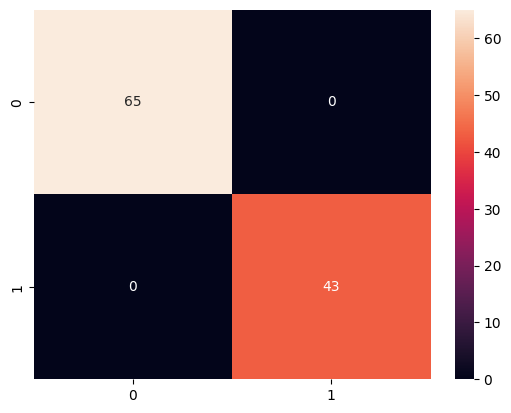

In [ ]:
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='d')